In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
c
import numpy as np
import sklearn

In [65]:
df = pd.read_csv('data.csv')

In [66]:
df.head() # returns the first n rows of the csv data, 5 by default

,contours_points,amount_contours,contour_length_area_ratio,contour_length_rect_area_ratio,contour_length_hull_area_ratio,contour_rect_length_ratio,contour_hull_length_ratio,extent,solidity,aspect_ratio,hull_rectangle_ratio,corners,harris_corners,type
0,676,3,0.077310,0.038085,0.052714,1.149038,1.318301,0.492630,0.681845,3.399329,0.722495,53,901,Buerste
1,1725,3,0.038508,0.028407,0.028407,1.810974,1.810974,0.737693,0.737693,1.000000,1.000000,92,1582,Buerste
2,514,2,0.049727,0.030935,0.039520,0.977736,1.134376,0.622092,0.794733,0.487047,0.782769,62,305,Buerste
3,492,83,0.447584,0.087969,0.123541,1.140181,1.214194,0.196542,0.276019,0.124905,0.712062,52,15,Buerste
4,988,5,0.042451,0.019822,0.032316,1.150258,1.313623,0.466943,0.761256,1.197183,0.613385,54,1504,Buerste


In [67]:
df.shape # store the number of rows and columns

(800, 14)

Classes of strings as numbers so that L-methods are applicable

In [68]:
type_to_int = {'Kamm': 0,'Buerste': 1}
df['type'] = df['type'].map(type_to_int)
df.head()

,contours_points,amount_contours,contour_length_area_ratio,contour_length_rect_area_ratio,contour_length_hull_area_ratio,contour_rect_length_ratio,contour_hull_length_ratio,extent,solidity,aspect_ratio,hull_rectangle_ratio,corners,harris_corners,type
0,676,3,0.077310,0.038085,0.052714,1.149038,1.318301,0.492630,0.681845,3.399329,0.722495,53,901,1
1,1725,3,0.038508,0.028407,0.028407,1.810974,1.810974,0.737693,0.737693,1.000000,1.000000,92,1582,1
2,514,2,0.049727,0.030935,0.039520,0.977736,1.134376,0.622092,0.794733,0.487047,0.782769,62,305,1
3,492,83,0.447584,0.087969,0.123541,1.140181,1.214194,0.196542,0.276019,0.124905,0.712062,52,15,1
4,988,5,0.042451,0.019822,0.032316,1.150258,1.313623,0.466943,0.761256,1.197183,0.613385,54,1504,1


## Data Visualisation

Histogram of the method (characteristics and Result/Class)

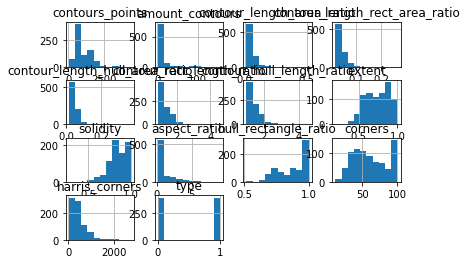

In [69]:
df.hist()
plt.show()

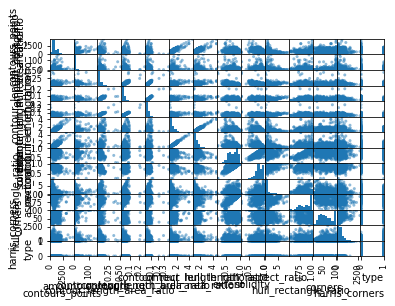

In [70]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

In [71]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print('X: ', X.shape, 'y: ',y.shape)

X:  (800, 13) y:  (800,)


## Split into Training and test data

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

print('X_train: ', X_train.shape, 'y_train: ',y_train.shape)
print('X_test: ', X_test.shape, 'y_test:', y_test.shape)

X_train:  (640, 13) y_train:  (640,)
X_test:  (160, 13) y_test: (160,)


In [73]:
X_train.head()

,contours_points,amount_contours,contour_length_area_ratio,contour_length_rect_area_ratio,contour_length_hull_area_ratio,contour_rect_length_ratio,contour_hull_length_ratio,extent,solidity,aspect_ratio,hull_rectangle_ratio,corners,harris_corners
264,1580,2,0.033369,0.025738,0.025738,1.640796,1.640796,0.771303,0.771303,1.000000,1.000000,74,897
615,1478,3,0.034397,0.024131,0.024342,1.538360,1.559016,0.701546,0.707667,1.000000,0.991349,78,251
329,920,4,0.041296,0.017720,0.027829,1.043869,1.186499,0.429098,0.673894,1.164384,0.636745,78,355
342,472,2,0.055689,0.031902,0.045018,0.965139,1.177629,0.572855,0.808389,0.470899,0.708638,73,149
394,676,2,0.047035,0.028004,0.036013,1.012745,1.160856,0.595382,0.765670,3.182118,0.777596,56,159


# Train and apply with different Machine Learning Model

### Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

bktree_clf = DecisionTreeClassifier()

bktree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(121.57812500000001, 209.6742857142857, 'X[10] <= 0.808\ngini = 0.5\nsamples = 640\nvalue = [320, 320]'),
 Text(35.650000000000006, 194.14285714285714, 'X[2] <= 0.037\ngini = 0.325\nsamples = 206\nvalue = [42, 164]'),
 Text(18.6, 178.61142857142858, 'X[8] <= 0.848\ngini = 0.291\nsamples = 17\nvalue = [14, 3]'),
 Text(14.466666666666669, 163.07999999999998, 'X[10] <= 0.65\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(10.333333333333334, 147.54857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(18.6, 147.54857142857142, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(22.733333333333334, 163.07999999999998, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(52.7, 178.61142857142858, 'X[4] <= 0.074\ngini = 0.252\nsamples = 189\nvalue = [28, 161]'),
 Text(31.000000000000004, 163.07999999999998, 'X[6] <= 2.301\ngini = 0.143\nsamples = 168\nvalue = [13, 155]'),
 Text(26.86666666666667, 147.54857142857142, 'X[1] <= 85.5\ngini = 0.124\nsamples = 166\nvalue = [11, 155]'

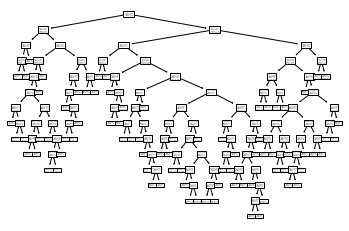

In [75]:
tree.plot_tree(bktree_clf)

In [76]:
print('Accuracy Decision Tree: ', bktree_clf.score(X_test,y_test))

Accuracy Decision Tree:  0.74375


### Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

bkbayes_clf = GaussianNB()

bkbayes_clf.fit(X_train, y_train)

print('Accuracy Bayes:', bkbayes_clf.score(X_test, y_test))

Accuracy Bayes: 0.61875


In [78]:
bk_y_pred = bkbayes_clf.predict(X_test)
print('Accuracy Bayes 2.Mal: ', accuracy_score(y_test, bk_y_pred))

Accuracy Bayes 2.Mal:  0.61875
